In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
x0, x1 = -5, 5
y0, y1 = -3, 3

x = np.linspace(x0, x1, 500)
y = np.linspace(y0, y1, 500)
x, y = np.meshgrid(x, y)

z1 = np.exp(-x ** 2 - y ** 2)
z2 = np.exp(-(x - 1) ** 2 - (y - 1) ** 2)
z = (z1 - z2) * 2

In [3]:
# set up a colormap
palette = plt.cm.gray.with_extremes(over="r", under="g", bad="b")

# Alternatively, we could use
# palette.set_bad(alpha = 0.0)
# to make the bad region transparent. This is the default.
# If you comment out all the palette.set* lines, you will see
# all the defaults; under and over will be colored with the
# first and last colors in the palette, respectively.

zm = np.ma.masked_where(z > 1.2, z)

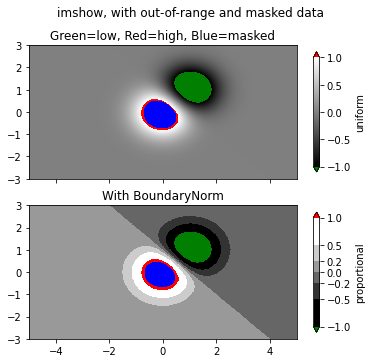

In [4]:
# set up the Axes objects
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 5.4))

# plot using 'continuous' colormap
# By setting vmin and vmax in the norm, we establish the
# range to which the regular palette color scale is applied.
# Anything above that range is colored based on palette.set_over, etc.
im = ax1.imshow(
    zm, interpolation="bilinear", cmap=palette,
    norm=colors.Normalize(vmin=-1.0, vmax=1.0),
    aspect="auto", origin="lower",
    extent=[x0, x1, y0, y1],
)
ax1.set_title("Green=low, Red=high, Blue=masked")

cbar = fig.colorbar(im, extend="both", shrink=0.9, ax=ax1)
cbar.set_label("uniform")
ax1.tick_params(axis="x", labelbottom=False)

# plot using a small number of colors, with unevenly spaced boundaries.
im = ax2.imshow(
    zm, interpolation="nearest", cmap=palette,
    norm=colors.BoundaryNorm([-1, -0.5, -0.2, 0, 0.2, 0.5, 1], ncolors=palette.N),
    aspect="auto", origin="lower", extent=[x0, x1, y0, y1],
)
ax2.set_title("With BoundaryNorm")

cbar = fig.colorbar(im, extend="both", spacing="proportional", shrink=0.9, ax=ax2)
cbar.set_label("proportional")

fig.suptitle("imshow, with out-of-range and masked data")
plt.show()